# Übung 3 - Gauß-Klassifikator

In [19]:
import numpy as np
from numpy.linalg import pinv, cond, norm
from math import pi, e, pow, sqrt
from random import randint

### Loading the training sets

In [20]:
three = np.loadtxt('train3',delimiter=',')
five = np.loadtxt('train5',delimiter=',')
seven = np.loadtxt('train7',delimiter=',')
eight = np.loadtxt('train8',delimiter=',')

### Loading and combining the test sets for the various matchups

In [21]:
testset = np.loadtxt('zip.test')

testlist = []
totest = [3,5,7,8]

for i in totest:
    testlist.append(testset[testset[:,0] == i])
    
### set with 3 and 5
left = np.concatenate(((np.full((testlist[0].shape[0],1),0)),testlist[0][:,1:]),axis=1)
right = np.concatenate(((np.full((testlist[1].shape[0],1),1)),testlist[1][:,1:]),axis=1)
threefive_test = np.concatenate((left,right),axis=0)

### set with 3 and 7
left = np.concatenate(((np.full((testlist[0].shape[0],1),0)),testlist[0][:,1:]),axis=1)
right = np.concatenate(((np.full((testlist[2].shape[0],1),1)),testlist[2][:,1:]),axis=1)
threeseven_test = np.concatenate((left,right),axis=0)

### set with 3 and 8
left = np.concatenate(((np.full((testlist[0].shape[0],1),0)),testlist[0][:,1:]),axis=1)
right = np.concatenate(((np.full((testlist[3].shape[0],1),1)),testlist[3][:,1:]),axis=1)
threeeight_test = np.concatenate((left,right),axis=0)

### set with 5 and 7
left = np.concatenate(((np.full((testlist[1].shape[0],1),0)),testlist[1][:,1:]),axis=1)
right = np.concatenate(((np.full((testlist[2].shape[0],1),1)),testlist[2][:,1:]),axis=1)
fiveseven_test = np.concatenate((left,right),axis=0)

### set with 5 and 8
left = np.concatenate(((np.full((testlist[1].shape[0],1),0)),testlist[1][:,1:]),axis=1)
right = np.concatenate(((np.full((testlist[3].shape[0],1),1)),testlist[3][:,1:]),axis=1)
fiveeight_test = np.concatenate((left,right),axis=0)

### set with 8 and 5
left = np.concatenate(((np.full((testlist[3].shape[0],1),0)),testlist[3][:,1:]),axis=1)
right = np.concatenate(((np.full((testlist[1].shape[0],1),1)),testlist[1][:,1:]),axis=1)
eightfive_test = np.concatenate((left,right),axis=0)

### set with 7 and 8
left = np.concatenate(((np.full((testlist[2].shape[0],1),0)),testlist[2][:,1:]),axis=1)
right = np.concatenate(((np.full((testlist[3].shape[0],1),1)),testlist[3][:,1:]),axis=1)
seveneight_test = np.concatenate((left,right),axis=0)

### Our Gauß Classifier Class

In [22]:
class GaussClassifier:
    
    def train(self,X1,X2):
        """calculates and saves values for mu and Sigma, as well as the 'corrected' vector values"""
        self.X1_mu = self.calc_mu(X1)
        self.X1_centered = self.center(X1, self.X1_mu)
        self.X1_Sigma = self.calc_Sigma(self.X1_centered, self.X1_mu)
        self.X2_mu = self.calc_mu(X2)
        self.X2_centered = self.center(X2, self.X2_mu)
        self.X2_Sigma = self.calc_Sigma(self.X2_centered, self.X2_mu)
        
    def calc_mu(self,X):
        """calculates mu"""
        return np.mean(X,axis=0,dtype=np.float64)
    
    def center(self,X,mu):
        """'corrects' all data points by subtracting mu from each row"""
        return np.subtract(X,mu)
    
    """def calc_Sigma(self,X,mu):
        return (1/X.shape[0]) * np.dot(X,X.T)"""
    
    def calc_Sigma(self,X,mu):
        """calculates Sigma"""
        return (1/X.shape[0]) * np.dot(X.T,X)
    
    def calc_prob(self,mu,Sigma,testset):
        """calculates the probability that each row is in the given class (defined by its mu and Sigma)"""
        result = np.ones(testset.shape[0])
        for i in range(testset.shape[0]):
            determinant = sqrt(norm(2 * pi * Sigma))
            centered = np.subtract(testset[i],mu)
            power = (-0.5) * (np.dot(np.dot(centered.T,pinv(Sigma)),centered))
            result[i] = (1/determinant) * pow(e,power)
            #result[i] = pow(e,power)
        return result
            
    def predict(self,testset):
        """the actual prediction process
        we included a random predictor because some rows deliver 0s for both probabilities, which favoured the first named class"""
        self.X_test = testset[:,1:]
        self.y_test = testset[:,0]
        self.X1_pred = self.calc_prob(self.X1_mu,self.X1_Sigma,self.X_test)
        self.X2_pred = self.calc_prob(self.X2_mu,self.X2_Sigma,self.X_test)
        self.prediction = np.ones(testset.shape[0])
        for i in range(testset.shape[0]):
            if self.X1_pred[i] > self.X2_pred[i]:
                self.prediction[i] = 0
            elif self.X1_pred[i] < self.X2_pred[i]:
                self.prediction[i] = 1
            else:
                self.prediction[i] = randint(0,1)
        return self.prediction
    
    def error_rate(self):
        """calculates the error rate of the prediction"""
        pred = self.prediction
        testlabels = self.y_test
        datacount = pred.shape[0]
        bools = np.equal(testlabels,pred)
        correct = np.sum(bools)
        return (datacount-correct)/datacount
        #return pred
    
    def confusion_matrix(self):
        """gives out the confusion matrix of the prediction"""
        preds = self.prediction
        testlabels = self.y_test
        size = testlabels.size
        mtrx = np.zeros((2,2))
        for i in range(0,size):
            mtrx[int(testlabels[i]),int(preds[i])] += 1
        return mtrx

### 3 vs 5

In [23]:
threefive = GaussClassifier()
threefive.train(three,five)
threefive.predict(threefive_test)
print("error rate:",threefive.error_rate())
threefive.confusion_matrix().astype('uint16')

error rate: 0.0766871165644


array([[149,  17],
       [  8, 152]], dtype=uint16)

### 3 vs 7

In [24]:
threeseven = GaussClassifier()
threeseven.train(three,seven)
threeseven.predict(threeseven_test)
print("error rate:",threeseven.error_rate())
threeseven.confusion_matrix().astype('uint16')

error rate: 0.0702875399361


array([[160,   6],
       [ 16, 131]], dtype=uint16)

### 3 vs 8

In [25]:
threeeight = GaussClassifier()
threeeight.train(three,eight)
threeeight.predict(threeeight_test)
print("error rate:",threeeight.error_rate())
threeeight.confusion_matrix().astype('uint16')

error rate: 0.120481927711


array([[151,  15],
       [ 25, 141]], dtype=uint16)

### 5 vs 7

In [26]:
fiveseven = GaussClassifier()
fiveseven.train(five,seven)
fiveseven.predict(fiveseven_test)
print("error rate:",fiveseven.error_rate())
fiveseven.confusion_matrix().astype('uint16')

error rate: 0.0553745928339


array([[154,   6],
       [ 11, 136]], dtype=uint16)

### 5 vs 8

In [27]:
fiveeight = GaussClassifier()
fiveeight.train(five,eight)
fiveeight.predict(fiveeight_test)
print("error rate:",fiveeight.error_rate())
fiveeight.confusion_matrix().astype('uint16')

error rate: 0.0858895705521


array([[153,   7],
       [ 21, 145]], dtype=uint16)

### 8 vs 5

Note the differences between the two confusion matrices, as a result of the randomised classification when p(x) for both classes results in 0. Prior to the randomisation, there was a marked bias towards the class that was named first.

In [28]:
eightfive = GaussClassifier()
eightfive.train(eight,five)
eightfive.predict(eightfive_test)
print("error rate:",eightfive.error_rate())
eightfive.confusion_matrix().astype('uint16')

error rate: 0.0736196319018


array([[150,  16],
       [  8, 152]], dtype=uint16)

For comparison, here were the results for 5vs8 and 8vs5 before the randomised classification was implemented:

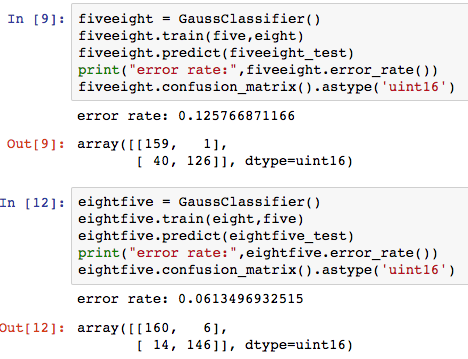

### 7 vs 8

In [29]:
seveneight = GaussClassifier()
seveneight.train(seven,eight)
seveneight.predict(seveneight_test)
print("error rate:",seveneight.error_rate())
seveneight.confusion_matrix().astype('uint16')

error rate: 0.115015974441


array([[128,  19],
       [ 17, 149]], dtype=uint16)